In [621]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)


# Display the data table for preview


In [622]:
city_data_df.head()

In [623]:
ride_data_df.head()

In [624]:
# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data_df,city_data_df, how="left",on=["city","city"])
city_ride_data.head()

## Bubble Plot of Ride Sharing Data

In [625]:
# Obtain the x and y coordinates for each of the three city types (Urban city)
urban_city = city_ride_data[city_ride_data["type"]=="Urban"]
#urban_city.head()

In [626]:
#Goup by the Urban city
urban_ride_count=urban_city.groupby(["city"]).count()["ride_id"]
#urban_ride_count.head()

In [627]:
# Obtain the x and y coordinates for Suburban as one of the three city types
suburban_city = city_ride_data[city_ride_data["type"]=="Suburban"]
#suburban_city.head()

In [628]:
#Group by the Suburban city ride 
suburban_ride_count=suburban_city.groupby(["city"]).count()["ride_id"]
#suburban_ride_count.head()

In [629]:
# Obtain the x and y coordinates for Rural as one of the three city types
rural_city = city_ride_data[city_ride_data["type"]=="Rural"]
#rural_city.head()

In [630]:
#Group by the Rural city ride 
rural_ride_count=rural_city.groupby(["city"]).count()["ride_id"]
#rural_ride_count.head()

In [631]:
# Create the GroupBy object based on the "Type" column
city_type = city_ride_data.groupby(["type"])
#city_type.head()

In [632]:
#Average Fare ($) Per City
average_rides = pd.DataFrame(city_ride_data.groupby(['type','city'])['fare'].mean())
#average_rides.head()

In [633]:
# Obtains dataframes for each city type 
city_type_df = [city_ride_data.loc[city_ride_data['type'] == citytype,:] for citytype in city_types]
#city_type_df

In [642]:
#Total Number of Rides Per City
#total_num_rides = [city_type.groupby('city')['ride_id'].count() for city_type in city_type_df]
#total_num_rides

In [643]:
# Total Number of Drivers Per City
total_num_drivers = [city_type.groupby('city')['driver_count'].count() for city_type in city_type_df]
#total_num_drivers

In [644]:
# Count per city grouped by type and each city.
driver_count_city = pd.DataFrame(city_ride_data.groupby(['type','city'])['driver_count'].mean())
#driver_count_city.head()


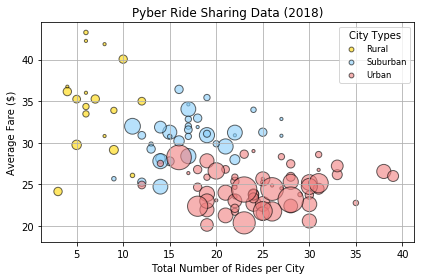

In [653]:
# Types of cities in a sorted list
city_types = list(sorted(set(city_ride_data['type'])))

# Obtains dataframes for each city type and stores each data frame as a list
city_type_df = [city_ride_data.loc[city_ride_data['type'] == citytype,:] for citytype in city_types_df]

# Obtains your x and y coordinates for each city type and stores the data frames as a list   
total_num_rides = [city_type.groupby('city')['ride_id'].count() for city_type in city_type_df]
avg_rides = [city_type.groupby('city')['fare'].mean() for city_type in city_type_df]

colors = ['gold', 'lightskyblue', 'lightcoral']

for x,y,z in zip(num_rides,avg_rides, colors):
        plt.scatter(x, y, s= 10*driver_count_city, c = z, edgecolors = 'black',alpha = 0.6)

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2018)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides per City')


# Create a legend
plt.legend(labels = city_types, title = 'City Types', fontsize = 'small',markerscale = .25)

# Save Figure
plt.grid()
plt.tight_layout()
plt.savefig('Pyber_Scatterplot.png')
plt.show()

## Total Fares by City Type

In [506]:
#Percentage of fare per each type of the city
type_city_percentage = 100 * (city_ride_data.groupby(["type"]).sum()["fare"] / city_ride_data["fare"].sum())
print(type_city_percentage)

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64


In [517]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
type_city_percentage

# The colors of each section of the pie chart
colors = ['gold', 'lightskyblue', 'lightcoral']

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

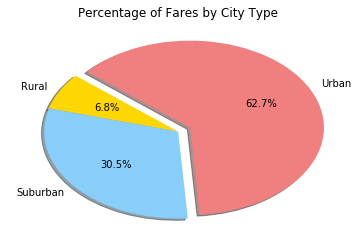

In [518]:
plt.pie(type_city_percentage, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title ("Percentage of Fares by City Type")
plt.savefig("../Images/citytyperfare.png")


In [448]:
# Show Figure
plt.show()

## Total Rides by City Type

In [443]:
#Percentage of total ride_Id of each type of the city
type_city_percentage_1 = 100 * (city_ride_data.groupby(["type"]).sum()["ride_id"] / city_ride_data["ride_id"].sum())
print(type_city_percentage_1)

type
Rural        5.005212
Suburban    26.766722
Urban       68.228066
Name: ride_id, dtype: float64


In [521]:
# Calculate Ride Percents

# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
type_city_percentage_1

# The colors of each section of the pie chart
#colors = ["orange", "blue", "red"]
colors = ['gold', 'lightskyblue', 'lightcoral']

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)



([<matplotlib.patches.Wedge at 0x11f01d5c0>,
 [Text(-0.942977,0.566387,'Rural'),
  Text(-0.986994,-0.485637,'Suburban'),
  Text(1.1464,0.354639,'Urban')],
 [Text(-0.514351,0.308939,'5.0%'),
  Text(-0.53836,-0.264893,'26.8%'),
  Text(0.668733,0.206873,'68.2%')])

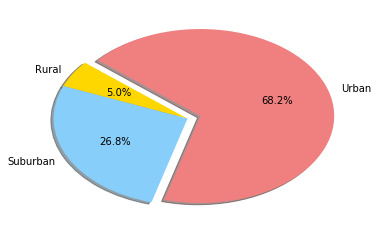

In [522]:
plt.pie(type_city_percentage_1, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Save Figure
#plt.savefig("../Images/citytyperride.png")

## Total Drivers by City Type

In [461]:
# Calculate Driver Percents
#Percentage of total driver_count of each type of the city
type_city_percentage_2 = 100 * (city_ride_data.groupby(["type"]).sum()["driver_count"] / city_ride_data["driver_count"].sum())
print(type_city_percentage_2)

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64


In [519]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
type_city_percentage_2

# The colors of each section of the pie chart
colors = ['gold', 'lightskyblue', 'lightcoral']

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

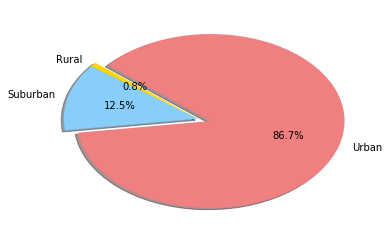

In [520]:
# Build Pie Charts
plt.pie(type_city_percentage_2, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Save Figure
plt.savefig("../Images/citytyperdrivers.png")